In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [4]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)


[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [6]:
plt.rcParams['figure.dpi']= 300

In [7]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [8]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')
refp99df = pd.read_excel('reference_pro99_axenic.xlsx')


In [9]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = 'results'

In [10]:
os.listdir(dpath)

['monte_add_OVERFLOW_df.csv.gz',
 'monte_ponly_add_OVERFLOW_clean_df.csv.gz',
 'ponly_monte_add_ROS_round2_sum.csv.gz',
 'monte_ponly_clean_mse.csv.gz',
 'monte2_ponly_sum.csv.gz',
 'sensitivity_vmax2_df.csv.gz',
 'monte_ponly_clean_df.csv.gz',
 'monte_ponly_fix_OVERFLOW_df.csv.gz',
 'monte_het_minmse.csv.gz',
 'sensitivity_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_sum.csv.gz',
 'ponly_monte_add_ROS_round2_df.csv.gz',
 'monte_add_het_mse.csv.gz',
 'monte_ponly_add_OVERFLOW_df.csv.gz',
 'monte_ponly_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_mse.csv.gz',
 'monte_ponly_fix_OVERFLOW_clean_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_df.csv.gz',
 'baseline_df.csv.gz',
 'results_old_26122023',
 'monte_het_clean_sum.csv.gz',
 'baseline_sum.csv.gz',
 'monte2_add_het_mse.csv.gz',
 'monte_strong_ponly_clean_df.csv.gz',
 'sensitivity_vmax2_sum.csv.gz',
 'monte_fix_OVERFLOW_mse.csv.gz',
 'ponly_monte_add_ROS_round2_clean_sum.csv.

In [11]:
pro99_mode = False 
which_organism = 'ponly'
organism_to_tune = 'PRO'
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
) = get_constants_per_organism(pro99_mode, which_organism)
for model in ['OVERFLOW', 'MIXOTROPH', 'ROS', 'MIN', 'EXOENZYME']:
    params_to_update, bounds, log_params = get_param_tuning_values(model, organism_to_tune)
    


In [22]:
df = pd.read_csv(os.path.join(dpath,'ponly_monte_add_ROS_round2_clean_df.csv.gz',))
mse_df = pd.read_csv(os.path.join(dpath,'ponly_monte_add_ROS_round2_clean_mse.csv.gz',))
sum_df = pd.read_csv(os.path.join(dpath,'ponly_monte_add_ROS_round2_clean_sum.csv.gz',))

In [23]:
sum_df.run_id.head().unique()

array(['monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__35_lowN_ponly_ROS_h-5995356089035473808',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__5_lowN_ponly_ROS_h-5995356089035473808',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__22_lowN_ponly_ROS_h-5995356089035473808',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__72_pro99_ponly_ROS_h-5995356089035473808',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__86_lowN_ponly_ROS_h-5995356089035473808'],
      dtype=object)

In [24]:
sum_df[['id', 'media', 'which', 'model', 'hash']] = sum_df.run_id.str.rsplit('_', n=4, expand=True)
mse_df[['id', 'media', 'which', 'model', 'hash']] = mse_df.run_id.str.rsplit('_', n=4, expand=True)
df    [['id', 'media', 'which', 'model', 'hash']] =     df.run_id.str.rsplit('_', n=4, expand=True)

sum_df['idx'] = sum_df['id'] + '_' + sum_df['model']
mse_df['idx'] = mse_df['id'] + '_' + mse_df['model']
df    ['idx'] =     df['id'] + '_' +     df['model']

In [25]:
mse_df['RMSE'] = np.sqrt(mse_df['RMSE'])

In [26]:
mse_df.groupby('media').compare_points.describe()

,count,mean,std,min,25%,50%,75%,max
media,,,,,,,,
lowN,25386.0,74.0,0.0,74.0,74.0,74.0,74.0,74.0
pro99,25386.0,58.0,0.0,58.0,58.0,58.0,58.0,58.0


In [27]:
mse_df['ref_compare_points'] = mse_df.media.map({'lowN' : 74, 'pro99': 58})
bad_ids_missing_points = set(mse_df.loc[mse_df.ref_compare_points != mse_df.compare_points, 'idx' ])
len(bad_ids_missing_points)

0

In [28]:
min_values = df[var_names+ ['idx']].groupby('idx').min().min(axis=1)
bad_ids_negative_values = set(min_values[min_values< -1e-9].index)
len(bad_ids_negative_values)

0

In [29]:
min_values

idx
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__0_ROS     0.000000e+00
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__10_ROS    0.000000e+00
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__11_ROS    0.000000e+00
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__12_ROS    0.000000e+00
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010__monte__13_ROS    0.000000e+00
                                                                    ...     
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__monte__96_ROS     0.000000e+00
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__monte__97_ROS     0.000000e+00
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__monte__98_ROS    -5.718804e-22
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__monte__99_ROS    -3.550658e-22
monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__monte__9_ROS      0.000000e+00
Length: 8462, dtype: float64

In [30]:
bad_ids = bad_ids_missing_points | bad_ids_negative_values
len(bad_ids)

0

In [31]:
mse_df = mse_df.loc[~mse_df.idx.isin(bad_ids)].copy()
sum_df = sum_df.loc[~sum_df.idx.isin(bad_ids)].copy()
df     =     df.loc[    ~df.idx.isin(bad_ids)].copy()


In [32]:
sum_df.idx.nunique()

8462

In [33]:
# represent FL 0.1
NBIOMASS_LOD_NOT_GROWING = 2.34502821

In [34]:
mse_df.groupby('media')[['RMSE']].describe().T

media               lowN         pro99
RMSE count  25386.000000  25386.000000
     mean      50.910716    343.598367
     std       34.034376    322.666751
     min        7.347966     62.841697
     25%       32.446036    133.236614
     50%       34.049240    144.418961
     75%       65.570035    487.126621
     max      182.446824   1504.059105

In [35]:
#mse_df['RMSE'] = mse_df['RMSE'].clip(upper=1e5)

In [36]:
sum_df['model'].value_counts()

model
ROS    16924
Name: count, dtype: int64

In [37]:
#mean_scores_1 = mse_df.groupby(['model', 'idx', 'media'], as_index=False)[['RMSE_clip', 'lRMSE_clip']].mean()
mean_scores = mse_df.pivot_table(index=['model', 'idx'], columns='media', values='RMSE' )
mean_scores
#mean_scores.columns = ['_'.join(col).strip() for col in mean_scores.columns.values]
mean_scores.rename(columns={'lowN': 'RMSE_lowN', 'pro99': 'RMSE_pro99'}, inplace=True)

mean_scores = mean_scores.reset_index()
mean_scores

media,model,idx,RMSE_lowN,RMSE_pro99
0,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,115.931835,958.932952
1,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,62.410052,136.883240
2,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,36.644411,136.592124
3,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,33.573547,131.728449
4,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,57.804356,502.361900
...,...,...,...,...
8457,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,83.469105,747.924644
8458,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,82.430315,635.304587
8459,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,33.222869,136.545809
8460,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,33.222876,136.546008


In [38]:
mean_scores['RMSE'] = np.sqrt(mean_scores['RMSE_lowN']*  mean_scores['RMSE_pro99'])


In [39]:
mean_scores.groupby('model').describe().T

model                     ROS
media                        
RMSE_lowN  count  8462.000000
           mean     50.910716
           std      34.029374
           min       7.729323
           25%      33.222857
           50%      33.694641
           75%      65.565340
           max     181.984590
RMSE_pro99 count  8462.000000
           mean    343.598367
           std     322.665319
           min      63.671780
           25%     136.545047
           50%     143.881026
           75%     487.044329
           max    1500.168538
RMSE       count  8462.000000
           mean    130.347912
           std     105.109729
           min      25.935546
           25%      67.353181
           50%      69.641150
           75%     174.645801
           max     522.501250

In [40]:
sns.set_context('poster')

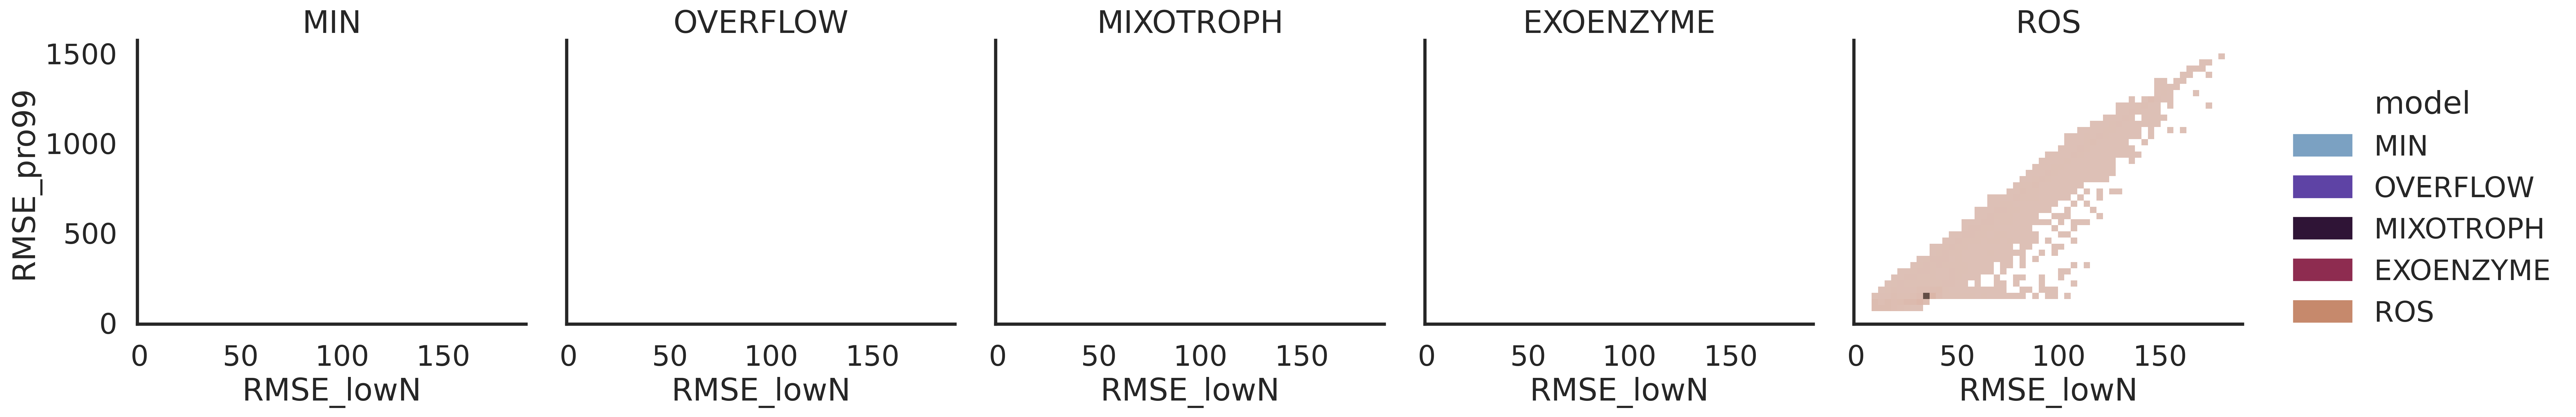

In [41]:
sns.displot(
    data=mean_scores,
    x='RMSE_lowN',  y='RMSE_pro99',
    hue='model', palette=mpalette, hue_order=morder,
    col='model', col_order=morder,
).set_titles(col_template='{col_name}', row_template='{row_name}')

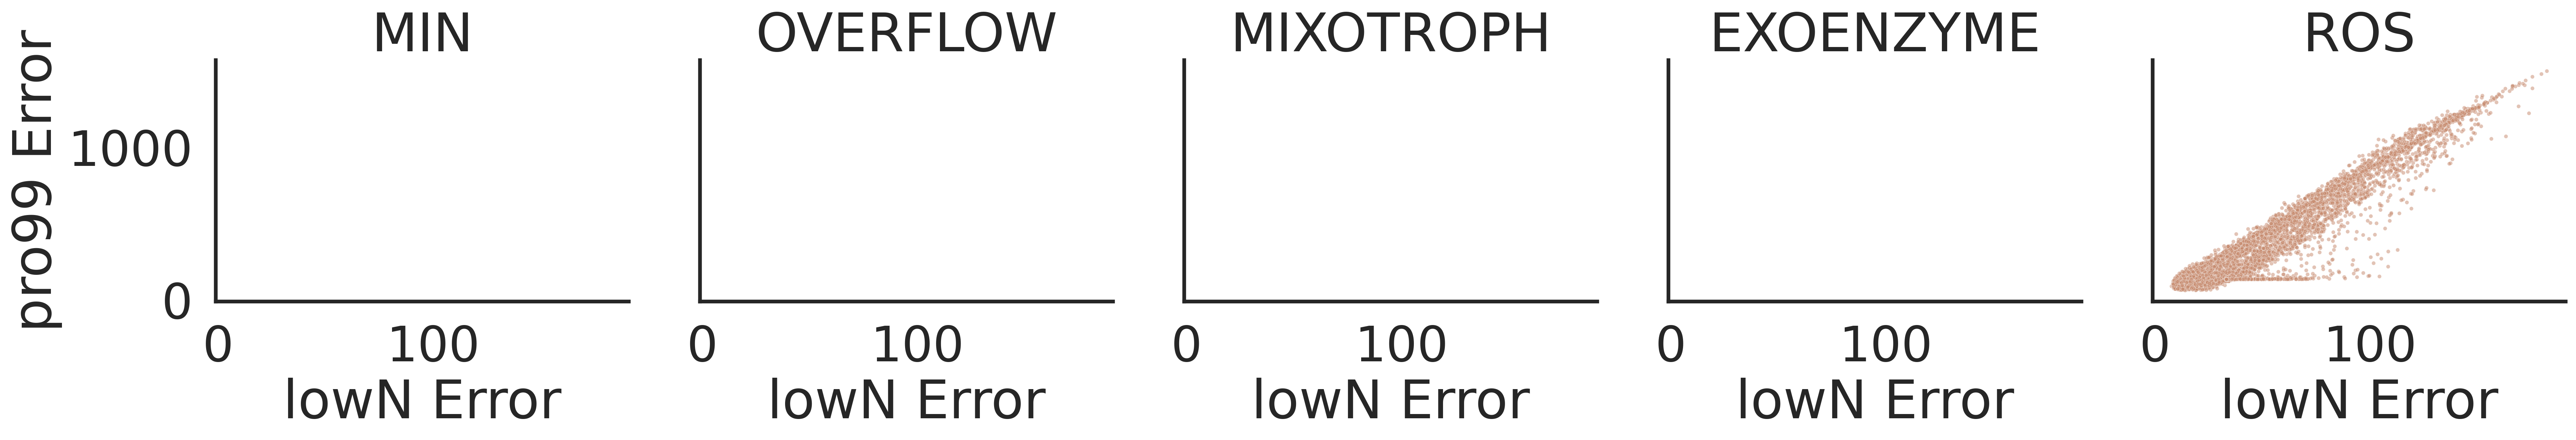

In [42]:
sns.set_context('poster',  font_scale=1.5)
g = sns.relplot(
    data=mean_scores,
    x='RMSE_lowN',  y='RMSE_pro99',
    hue='model', palette=mpalette, hue_order=morder,
    col='model', col_order=morder, #col_wrap=3,
    legend=False, s=7, alpha=0.5,
).set_titles(col_template='{col_name}', row_template='{row_name}')
g.set(xlabel='lowN Error', ylabel='pro99 Error', )
#plt.savefig('figures/ponly_sobol_error.svg')

In [43]:
mean_scores

media,model,idx,RMSE_lowN,RMSE_pro99,RMSE
0,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,115.931835,958.932952,333.422940
1,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,62.410052,136.883240,92.427756
2,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,36.644411,136.592124,70.748413
3,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,33.573547,131.728449,66.502566
4,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,57.804356,502.361900,170.407472
...,...,...,...,...,...
8457,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,83.469105,747.924644,249.857161
8458,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,82.430315,635.304587,228.841336
8459,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,33.222869,136.545809,67.353125
8460,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,33.222876,136.546008,67.353181


In [44]:
mean_scores_filtered = mean_scores.sort_values(
    by='RMSE',
)
#pmaxday_df #.loc[pmaxday_df[f'score_4'].ge(4)].copy()

In [45]:
mean_scores_filtered['lrank'] = mean_scores_filtered.groupby("model")["RMSE"].rank(method='first')
mean_scores_filtered['fit'] = 'bad'
#mean_scores_filtered.loc[mean_scores_filtered.lrank.le(100), 'fit'] = 'good'
mean_scores_filtered.loc[mean_scores_filtered.RMSE.le(60), 'fit'] = 'good'



In [46]:
mean_scores_filtered.fit.value_counts()

fit
bad     7240
good    1222
Name: count, dtype: int64

In [47]:
bestids = mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good']), 'idx']

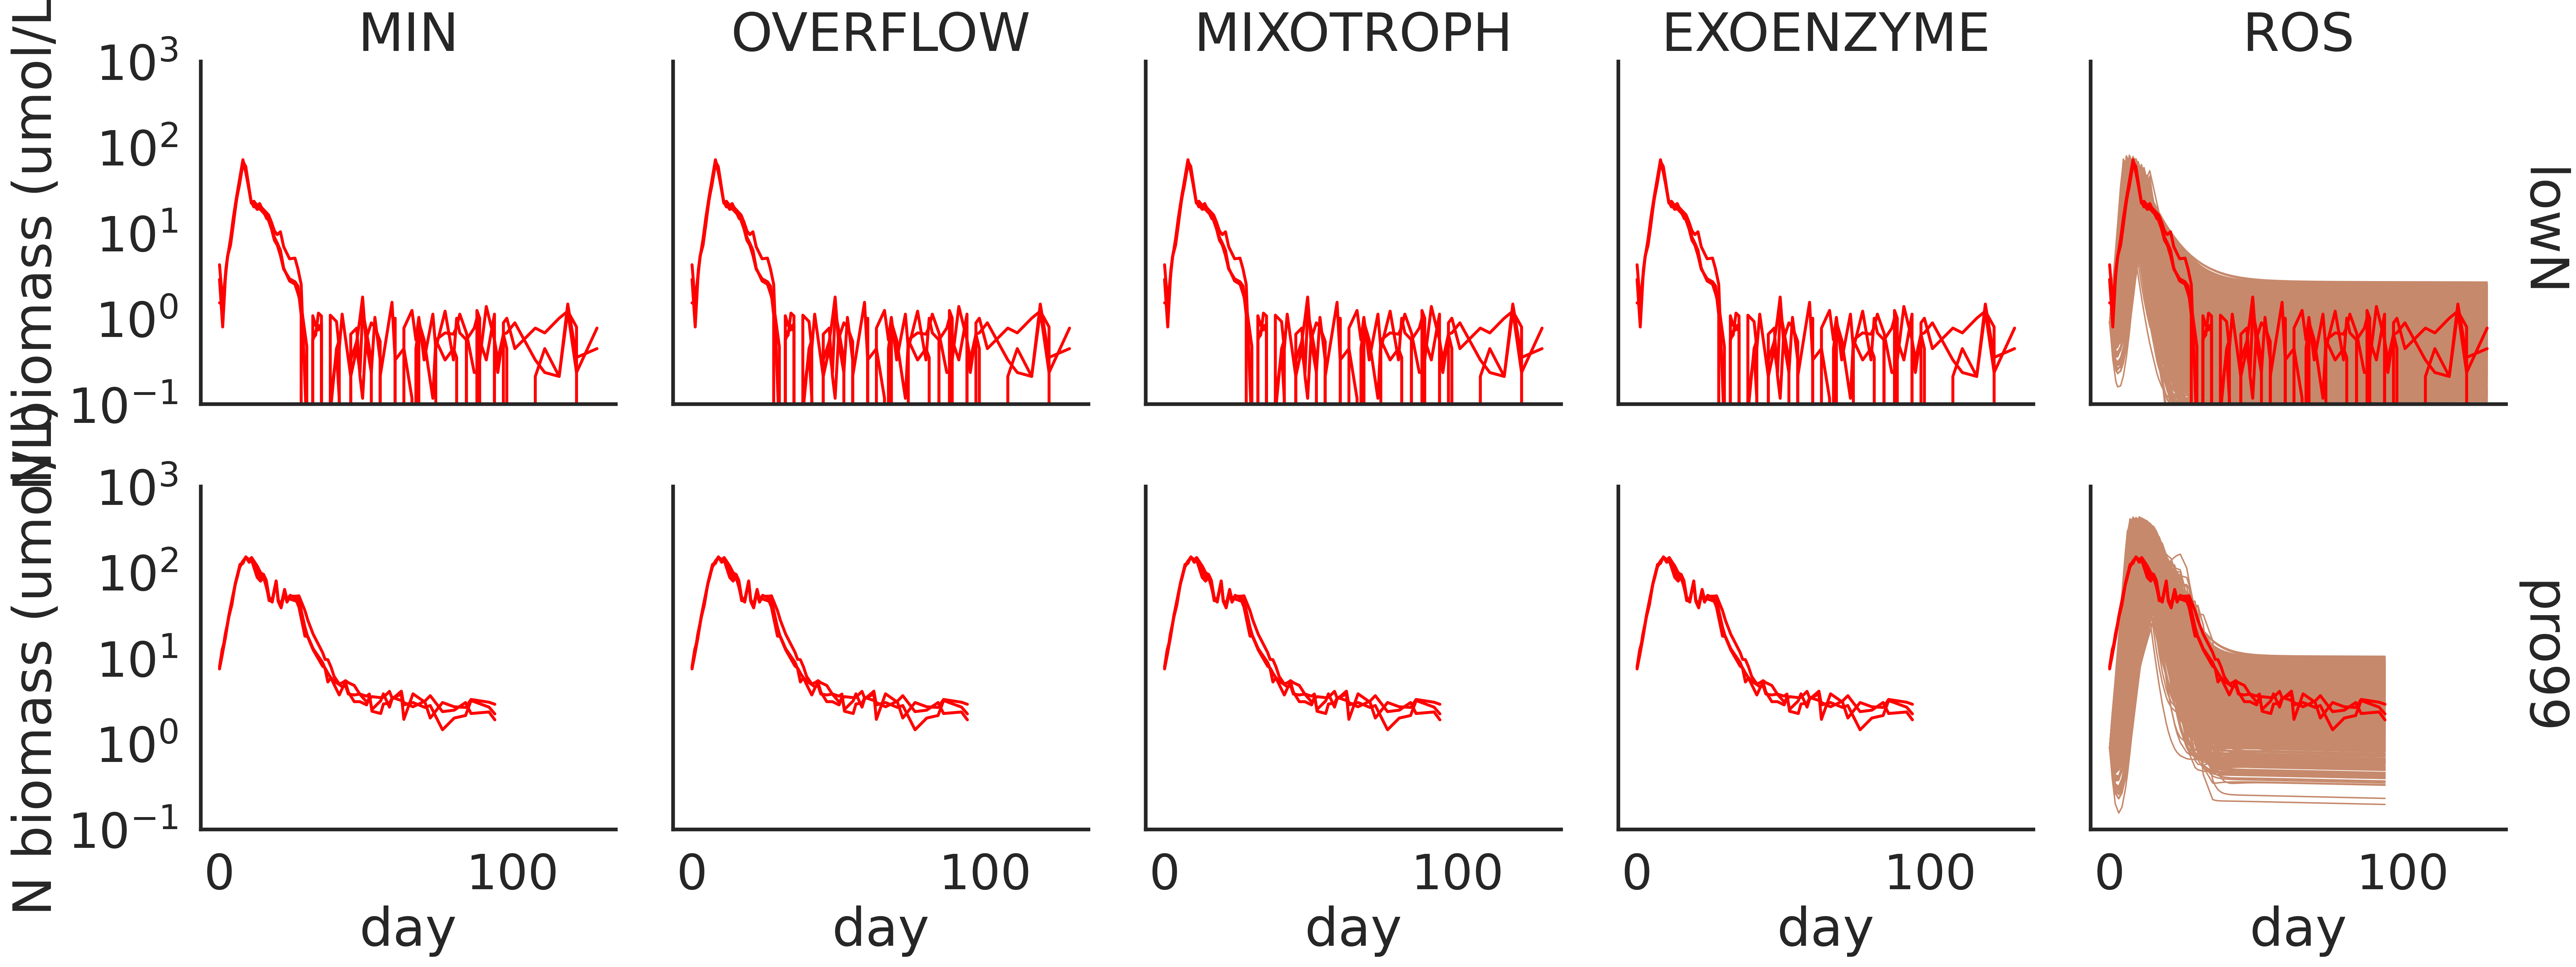

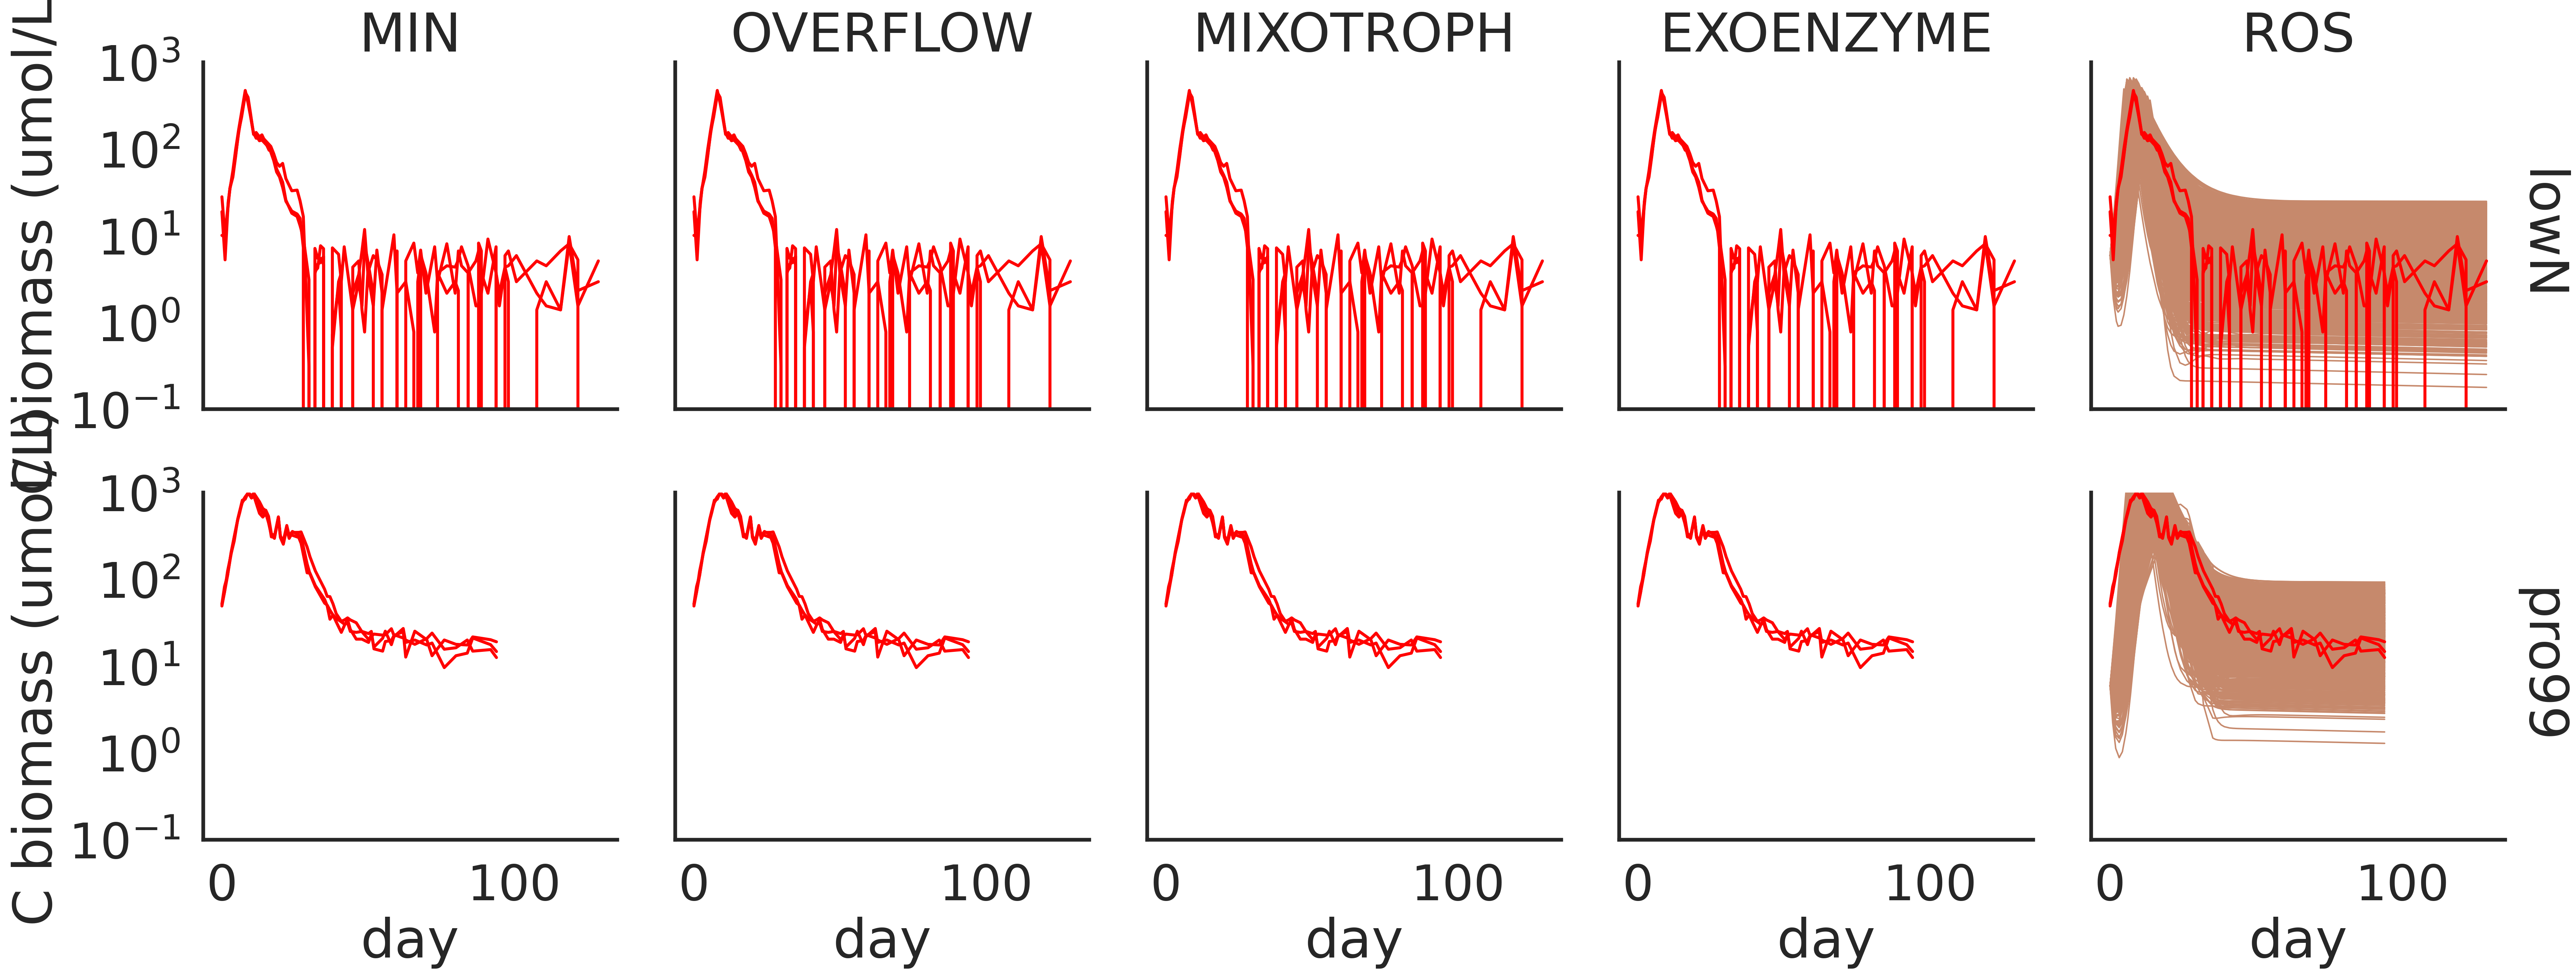

In [48]:
for n in ('N', 'C'):
    l= 'RMSE'
    g = sns.relplot(
        data=df.loc[df.idx.isin(bestids)],
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'Bptotal[{n}]', 
        row='media', row_order=media_order, lw=1,
        hue='model', hue_order=morder, palette=mpalette,
        col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (row_val,col_val), ax in g.axes_dict.items():
        datadf = refdf if row_val == 'lowN' else refp99df
        sns.lineplot(data=datadf, x='day', y=f'ref_Bp[{n}]',
        units='Sample', estimator=None, ax=ax, lw=2, color='red',

                     legend=False
                    )
    g.set(yscale='log', ylim=(1e-1,1e3))
    g.set(ylabel=f'{n} biomass (umol/L)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    #plt.suptitle(f'{n} - top models ({l})', y=1.03)

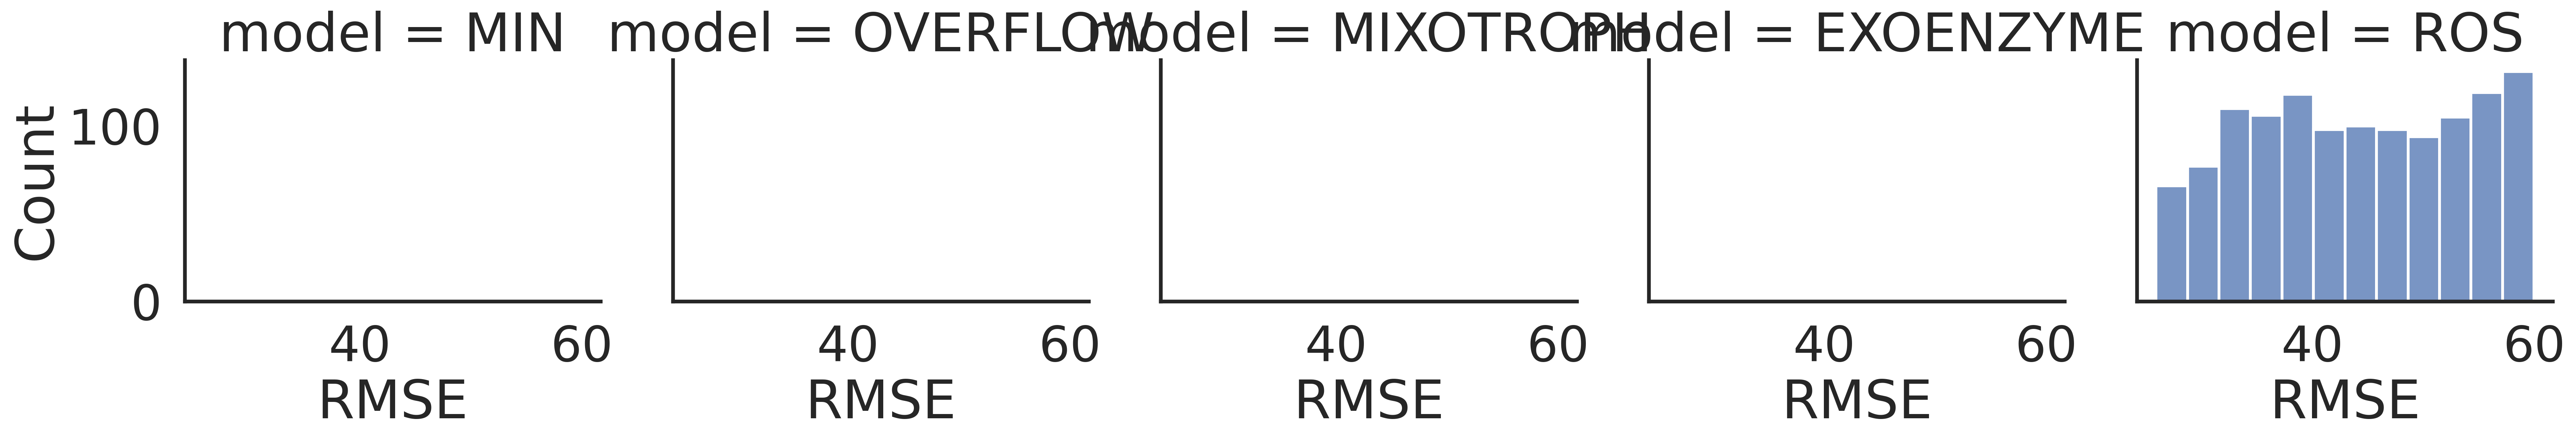

In [49]:
sns.displot(
    data=mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good'])],
    x='RMSE',
    col='model', col_order=morder,
)

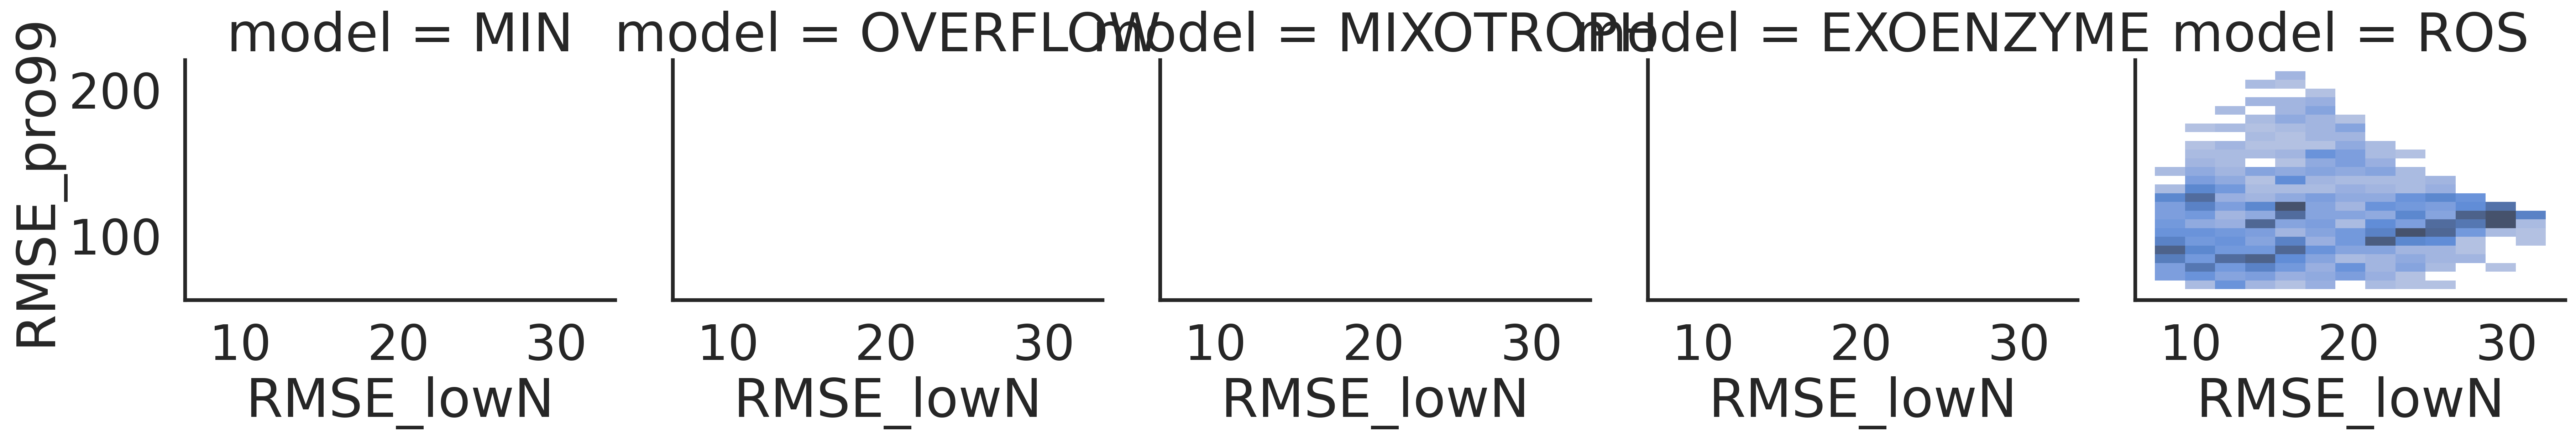

In [50]:
sns.displot(
    data=mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good'])],
    x='RMSE_lowN', y='RMSE_pro99',
    col='model', col_order=morder,
)

In [51]:
mean_scores_filtered.loc[mean_scores_filtered.idx.isin(bestids)].model.value_counts()


model
ROS    1222
Name: count, dtype: int64

In [52]:
mean_scores_filtered.model.value_counts()


model
ROS    8462
Name: count, dtype: int64

In [53]:
362/2607,149/995

(0.13885692366705024, 0.14974874371859295)

In [55]:
mean_scores_filtered.pivot_table(columns='fit', index='model',values='idx', aggfunc='count')

fit,bad,good
model,,
ROS,7240,1222


In [56]:
min_rows = mean_scores_filtered.loc[mean_scores_filtered['fit'].isin(['good'])]
min_rows

media,model,idx,RMSE_lowN,RMSE_pro99,RMSE,lrank,fit
3693,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_386__...,8.807838,76.369765,25.935546,1.0,good
7798,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_912__...,9.159151,74.636465,26.145873,2.0,good
7800,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_912__...,9.383190,73.254535,26.217575,3.0,good
2812,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_295__...,8.652631,79.520900,26.230994,4.0,good
7835,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_912__...,9.422703,73.402982,26.299325,5.0,good
...,...,...,...,...,...,...,...
4727,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_553__...,29.741533,120.620744,59.895291,1218.0,good
8013,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_932__...,20.845755,172.095662,59.895442,1219.0,good
6585,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_772__...,26.113164,137.416720,59.903133,1220.0,good
905,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1081_...,30.441095,118.103540,59.959996,1221.0,good


In [58]:
id_vars= ['model', 'idx']
sum_df1 = sum_df.drop_duplicates(subset='idx')
def _get_params_df(model):
    params_to_update, bounds, log_params = get_param_tuning_values(model, organism_to_tune)
    print(params_to_update)
    param_vals_map = get_param_vals(model)

    param_vals_df = sum_df1.loc[sum_df1.model.isin([model]), 
                                id_vars + params_to_update ]
    print(param_vals_df)
    mparam_vals = param_vals_df.melt( id_vars=id_vars)    
    mparam_vals['default'] = mparam_vals['variable'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.value / mparam_vals.default)
    return mparam_vals
model = 'ROS'
mparams_df = _get_params_df(model) 


['VmaxICp', 'VmaxINp', 'KICp', 'KINp', 'Mp', 'gammaDp', 'KprodROSp', 'KlossROSp', 'omegaP']
      model                                                idx   VmaxICp  \
0       ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...  0.000033   
1       ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...  0.000033   
2       ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...  0.000033   
3       ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...  0.000033   
4       ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...  0.000003   
...     ...                                                ...       ...   
16886   ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...  0.000033   
16889   ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...  0.000033   
16901   ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...  0.000033   
16910   ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...  0.000033   
16918   ROS  monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...  0.000002

In [59]:
mparams_df

,model,idx,variable,value,default,FC
0,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,VmaxICp,0.000033,0.000006,2.561640
1,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,VmaxICp,0.000033,0.000006,2.561640
2,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,VmaxICp,0.000033,0.000006,2.561640
3,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,VmaxICp,0.000033,0.000006,2.561640
4,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1010_...,VmaxICp,0.000003,0.000006,-1.093500
...,...,...,...,...,...,...
76153,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,omegaP,0.000033,0.000034,-0.024469
76154,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,omegaP,0.000054,0.000034,0.656797
76155,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,omegaP,0.000034,0.000034,0.000000
76156,ROS,monte_round2_ponly_ROS_vpro_19_33_ROS_C0_988__...,omegaP,0.000034,0.000034,0.000000


In [57]:
out_dpath = 'VPRO/ROS_round2'
for m in morder:
    os.makedirs(os.path.join(out_dpath, m), exist_ok=True)

In [67]:
min_rows.idx.unique()

array(['monte_round2_ponly_ROS_vpro_19_33_ROS_C0_386__monte__15_ROS',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_912__monte__40_ROS',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_912__monte__42_ROS', ...,
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_772__monte__25_ROS',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_1081__monte__18_ROS',
       'monte_round2_ponly_ROS_vpro_19_33_ROS_C0_65__monte__17_ROS'],
      dtype=object)

In [66]:
#vpro_32_25_OVERFLOW_C2.json
min_rows.idx.str.replace('monte_round2_ponly_ROS_vpro','vpro_2', regex=False).str.replace('_monte__', '', regex=True)

3693     vpro_2_19_33_ROS_C0_386_15_ROS
7798     vpro_2_19_33_ROS_C0_912_40_ROS
7800     vpro_2_19_33_ROS_C0_912_42_ROS
2812     vpro_2_19_33_ROS_C0_295_27_ROS
7835     vpro_2_19_33_ROS_C0_912_74_ROS
                     ...               
4727     vpro_2_19_33_ROS_C0_553_53_ROS
8013     vpro_2_19_33_ROS_C0_932_54_ROS
6585     vpro_2_19_33_ROS_C0_772_25_ROS
905     vpro_2_19_33_ROS_C0_1081_18_ROS
5383      vpro_2_19_33_ROS_C0_65_17_ROS
Name: idx, Length: 1222, dtype: object

In [68]:
import re
for idx in min_rows.idx:
    ser_x = mparams_df.loc[
        mparams_df.idx.isin([idx]) & ~mparams_df.FC.isna(), ['variable', 'value']
    ]
    ser_x.index= ser_x.variable
    actual_finalX = ser_x.value.to_dict()
    vpro_id = idx.replace('monte_round2_ponly_ROS_vpro','vpro_2').replace('_monte__','')
    fname = vpro_id
    model = mparams_df.loc[mparams_df.idx.isin([idx])]['model'].unique()[0]
    res_fpath = os.path.join(out_dpath, model, f'{fname}.json')
    print(res_fpath)
    params2json(actual_finalX, res_fpath)


VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_386_15_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_40_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_42_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_295_27_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_74_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_31_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_39_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_82_51_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_386_52_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_76_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_248_94_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_18_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_912_59_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_728_76_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_47_11_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_641_76_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_741_8_ROS.json
VPRO/ROS_round2/ROS/vpro_2_19_33_ROS_C0_741_30_ROS.